In [171]:
### Import the necessary libraries and dependencies.
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

%matplotlib inline

### Read CSV in as DataFrame
# Set the path
csvpath = Path("scrubbed_sarah_cleanup.csv")

# Read in the CSV as a DataFrame
df = pd.read_csv(
    csvpath, index_col="datetime", infer_datetime_format=True, parse_dates=True
)
df = df.sort_index()
df.head()

/opt/anaconda3/envs/project1env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (13,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,year,month,date.1,day,time,city,"location (land, in space, at sea, in flight)",state,country,country name,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sightings
datetime,,,,,,,,,,,,,,,,,,,
1906-11-11 00:00:00,1906-11-11,1906,Nov,11,Sunday,0:00:00,wien (austria),land,NaN,at,Austria,other,10800,3 h,The oldest professional photo of a UFO object ...,12/23/2002,48.208174,16.373819,1
1910-01-02 00:00:00,1910-01-02,1910,Jan,2,Sunday,0:00:00,kirksville (near),land,mo,us,United States of America (the),disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056,1
1910-06-01 15:00:00,1910-06-01,1910,Jun,1,Wednesday,15:00:00,wills point,land,tx,us,United States of America (the),cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056,1
1916-04-05 13:00:00,1916-04-05,1916,Apr,5,Wednesday,13:00:00,france (above; from aircraft),land,NaN,fr,France,cigar,60,about 1 min.,((NUFORC Note: Possible hoax. PD)) Saw 3 ci...,3/9/2004,46.227638,2.213749,1
1920-06-11 21:00:00,1920-06-11,1920,Jun,11,Friday,21:00:00,cicero,land,in,us,United States of America (the),unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,5/12/2009,40.1238889,-86.013333,1


In [172]:
# Explore useful data
sightings_new_df = df[["year","month","date.1","day","time","location (land, in space, at sea, in flight)","country","country name","shape","sightings"]]
sightings_new_df.head()

,year,month,date.1,day,time,"location (land, in space, at sea, in flight)",country,country name,shape,sightings
datetime,,,,,,,,,,
1906-11-11 00:00:00,1906,Nov,11,Sunday,0:00:00,land,at,Austria,other,1
1910-01-02 00:00:00,1910,Jan,2,Sunday,0:00:00,land,us,United States of America (the),disk,1
1910-06-01 15:00:00,1910,Jun,1,Wednesday,15:00:00,land,us,United States of America (the),cigar,1
1916-04-05 13:00:00,1916,Apr,5,Wednesday,13:00:00,land,fr,France,cigar,1
1920-06-11 21:00:00,1920,Jun,11,Friday,21:00:00,land,us,United States of America (the),unknown,1


In [173]:
### Sightings per country dataframe

In [173]:
# Create df of sightings per country
sightings_country  = df[["country","country name","sightings"]]
sightings_per_country = sightings_country.groupby("country").sum()

# Show top 20 countries for sightings
sightings_per_country.nlargest(20, "sightings")

,sightings
country,
us,70934
ca,3606
gb,2373
au,639
mx,233
in,210
de,132
nl,117
nz,99


<AxesSubplot:xlabel='country'>

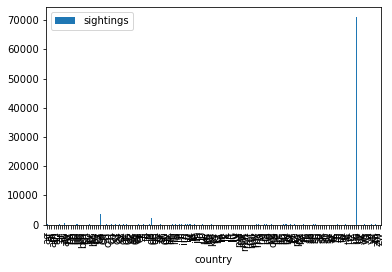

In [262]:
# Plot sightings per country on bar chart
sightings_per_country.plot.bar()

In [231]:
### Sightings per weekday dataframe

In [175]:
# Create dataframe with number of sightings per day of the week
sightings_day  = df[["day","sightings"]]
sightings_per_day = sightings_day.groupby("day").sum().reset_index()
sightings_per_day

,day,sightings
0,Friday,11620
1,Monday,10094
2,Saturday,14062
3,Sunday,11791
4,Thursday,11024
5,Tuesday,10777
6,Wednesday,10964


In [176]:
# Create a new index which corresponds with order of days of the week
new_index = [5,1,6,0,4,2,3]
sightings_per_day["new index"] = new_index
sightings_per_day = sightings_per_day.set_index(["new index"])
sightings_per_day

,day,sightings
new index,,
5,Friday,11620
1,Monday,10094
6,Saturday,14062
0,Sunday,11791
4,Thursday,11024
2,Tuesday,10777
3,Wednesday,10964


In [177]:
# Put days of the week in order by new index
sightings_per_day = sightings_per_day.sort_index(ascending=True)
sightings_per_day

,day,sightings
new index,,
0,Sunday,11791
1,Monday,10094
2,Tuesday,10777
3,Wednesday,10964
4,Thursday,11024
5,Friday,11620
6,Saturday,14062


In [178]:
# Get number of sightings per weekday as a percentage
sightings_per_day['percent'] = (sightings_per_day['sightings'] / 
                              sightings_per_day['sightings'].sum()) * 100

In [179]:
sightings_per_day

,day,sightings,percent
new index,,,
0,Sunday,11791,14.677837
1,Monday,10094,12.565354
2,Tuesday,10777,13.415575
3,Wednesday,10964,13.648359
4,Thursday,11024,13.723049
5,Friday,11620,14.464970
6,Saturday,14062,17.504855


<AxesSubplot:title={'center':'UFO Sightings by Day of Week'}, xlabel='Day of Week', ylabel='Percent'>

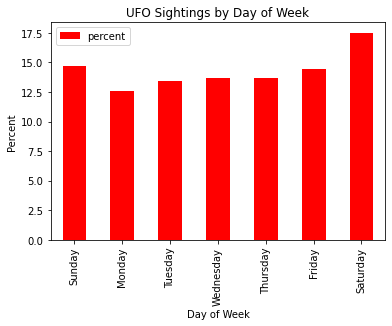

In [180]:
# Plot percentage of sightings per weekday on a bar chart
sightings_per_day.plot.bar('day','percent', rot=90, color="red", xlabel = "Day of Week", ylabel="Percent", title = "UFO Sightings by Day of Week")

In [232]:
### Sightings per month dataframe

In [181]:
# Create dataframe with number of sightings per month
sightings_month  = df[["month","sightings"]]
sightings_per_month = sightings_month.groupby("month").sum().reset_index()
sightings_per_month

,month,sightings
0,Apr,5527
1,Aug,8638
2,Dec,5664
3,Feb,4667
4,Jan,5689
5,Jul,9542
6,Jun,8130
7,Mar,5449
8,May,5292
9,Nov,6740


In [182]:
# Create a new index which corresponds with order of the months of the year
new_index = [3,7,11,1,0,6,5,2,4,10,9,8]
sightings_per_month["new index"] = new_index
sightings_per_month = sightings_per_month.set_index(["new index"])
sightings_per_month

,month,sightings
new index,,
3,Apr,5527
7,Aug,8638
11,Dec,5664
1,Feb,4667
0,Jan,5689
6,Jul,9542
5,Jun,8130
2,Mar,5449
4,May,5292


In [183]:
# Put months in order by new index
sightings_per_month = sightings_per_month.sort_index(ascending=True)
sightings_per_month

,month,sightings
new index,,
0,Jan,5689
1,Feb,4667
2,Mar,5449
3,Apr,5527
4,May,5292
5,Jun,8130
6,Jul,9542
7,Aug,8638
8,Sep,7588


In [184]:
# Get number of sightings per month as a percentage
sightings_per_month['percent'] = (sightings_per_month['sightings'] / 
                              sightings_per_month['sightings'].sum()) * 100

In [185]:
sightings_per_month

,month,sightings,percent
new index,,,
0,Jan,5689,7.081860
1,Feb,4667,5.809640
2,Mar,5449,6.783100
3,Apr,5527,6.880197
4,May,5292,6.587661
5,Jun,8130,10.120500
6,Jul,9542,11.878205
7,Aug,8638,10.752876
8,Sep,7588,9.445800


<AxesSubplot:title={'center':'UFO Sightings by Month'}, xlabel='Month', ylabel='Percent'>

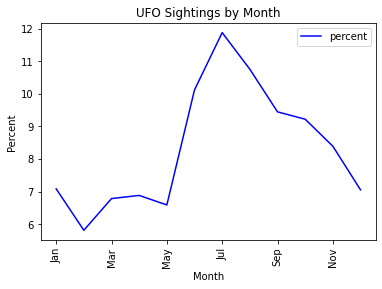

In [186]:
# Plot percentage of sightings per month on a line chart
sightings_per_month.plot.line('month','percent', rot=90, color="blue", xlabel = "Month", ylabel="Percent", title = "UFO Sightings by Month")

In [233]:
### Sightings per year dataframe

In [197]:
# Create dataframe with number of sightings per year
sightings_year  = df[["year","sightings"]]
sightings_per_year = sightings_year.groupby("year").sum().reset_index()
sightings_per_year

,year,sightings
0,1906,1
1,1910,2
2,1916,1
3,1920,1
4,1925,1
...,...,...
82,2010,4283
83,2011,5107
84,2012,7356
85,2013,7038


In [198]:
# Set index as year
sightings_per_year = sightings_per_year.set_index(["year"]).sort_index(ascending=True)
sightings_per_year

In [210]:
# Move sightings_per_year to csv - need to manually add missing years, to prevent error when plotting
sightings_per_year.to_csv('sightings_per_year.csv')

In [215]:
### Read 'sightings_all_years' CSV in as DataFrame
# Set the path
csvpath = Path("sightings_all_years.csv")

# Read in the CSV as a DataFrame
years_df = pd.read_csv(csvpath)
years_df = years_df.sort_index()
years_df.head()

,year,sightings
0,1906,1
1,1907,0
2,1908,0
3,1909,0
4,1910,2


<AxesSubplot:title={'center':'UFO Sightings per Year'}, xlabel='Year', ylabel='Sightings'>

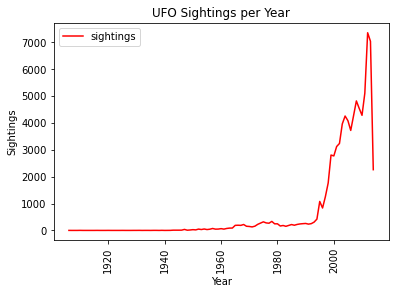

In [216]:
# Plot sightings per year on a line chart
years_df.plot.line('year','sightings', rot=90, color="red", xlabel = "Year", ylabel="Sightings", title = "UFO Sightings per Year")

In [226]:
# Find out top years for UFO sightings
years_df.sort_values('sightings', ascending=False).nlargest(10,'sightings')

,year,sightings
106,2012,7356
107,2013,7038
105,2011,5107
102,2008,4819
103,2009,4542
104,2010,4283
101,2007,4269
98,2004,4257
99,2005,4083
97,2003,3962


In [227]:
# Plot sightings from year 2000
# Get dataframe from 2000 onwards
df_2000s = years_df.loc[94:108]
df_2000s

,year,sightings
94,2000,2772
95,2001,3122
96,2002,3235
97,2003,3962
98,2004,4257
99,2005,4083
100,2006,3721
101,2007,4269
102,2008,4819
103,2009,4542


<AxesSubplot:title={'center':'UFO Sightings per Year from 2000'}, xlabel='Year', ylabel='Sightings'>

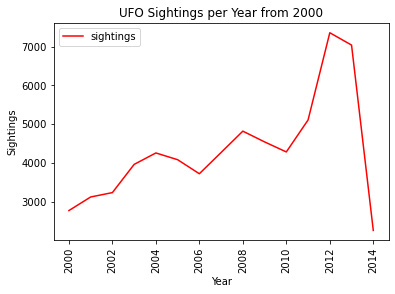

In [256]:
# Plot sightings per year for 2000s on a line chart
df_2000s.plot.line('year','sightings', rot=90, color="red", xlabel = "Year", ylabel="Sightings", title = "UFO Sightings per Year from 2000")

In [251]:
### Sightings per country per month dataframe
# Create a new DataFrame with the number of sightings by country per month
sightings_month_country = df[["month", "country", "sightings"]].groupby(["country","month"]).sum()

In [252]:
us_month = sightings_month_country[country("us")]
us_month

NameError: name 'country' is not defined

In [258]:
### Sightings by shape
# Create df of sightings by shape
sightings_shape  = df[["shape","sightings"]]
sightings_per_shape = sightings_shape.groupby("shape").sum()
sightings_per_shape

,sightings
shape,
changed,1
changing,1962
chevron,952
cigar,2057
circle,7608
cone,316
crescent,2
cross,233
cylinder,1283


In [260]:
### Sightings by location (air, sea, land, space)
# Create df of sightings by location
sightings_loc  = df[["location (land, in space, at sea, in flight)","sightings"]]
sightings_per_loc = sightings_loc.groupby("location (land, in space, at sea, in flight)").sum()
sightings_per_loc

,sightings
"location (land, in space, at sea, in flight)",
at sea,92
in flight,80
in space,7
land,80153
